<a href="https://www.kaggle.com/code/rajatraj0502/threads-an-instagram-app-reviews?scriptVersionId=138102777" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/threads-an-instagram-app-reviews/threads_reviews.csv


In [2]:
import pandas as pd


# Load the CSV file
df = pd.read_csv('/kaggle/input/threads-an-instagram-app-reviews/threads_reviews.csv')

# Display the first few rows of the DataFrame
df.head()


,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


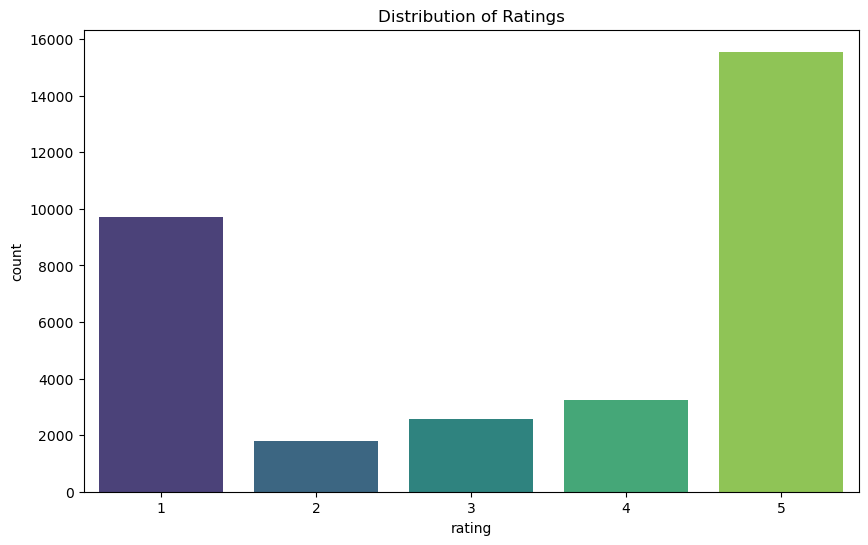

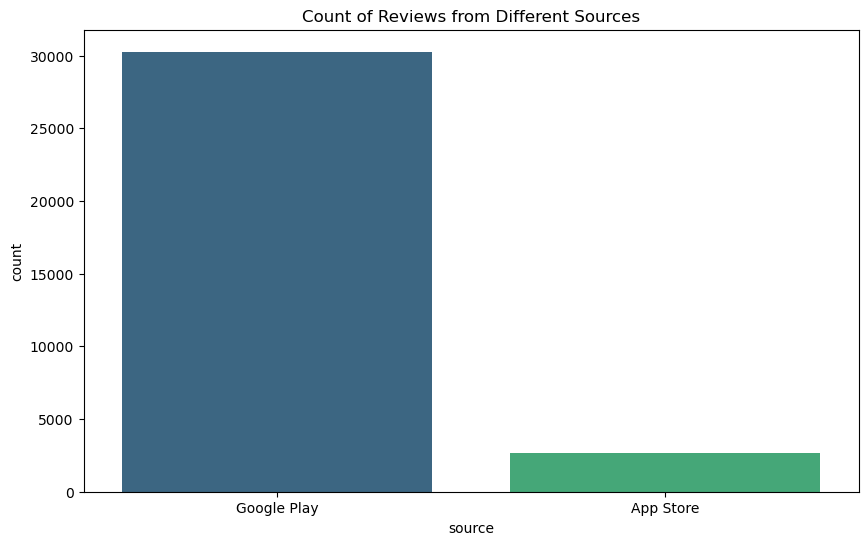

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.show()

# Check the count of reviews from different sources
plt.figure(figsize=(10, 6))
sns.countplot(x='source', data=df, palette='viridis')
plt.title('Count of Reviews from Different Sources')
plt.show()


In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
import string

In [5]:
def simple_preprocess_text(text):
    # Lowercase the text and split into words
    words = text.lower().split()
    
    return words

# Apply the text preprocessing function to the 1-star and 5-star reviews
one_star_reviews = df[df['rating'] == 1]['review_description'].apply(simple_preprocess_text)
five_star_reviews = df[df['rating'] == 5]['review_description'].apply(simple_preprocess_text)

# Flatten the lists of words and count the occurrences of each word
one_star_word_counts = Counter([word for words in one_star_reviews for word in words])
five_star_word_counts = Counter([word for words in five_star_reviews for word in words])

# Find the 10 most common words in 1-star and 5-star reviews
one_star_common_words = one_star_word_counts.most_common(10)
five_star_common_words = five_star_word_counts.most_common(10)

one_star_common_words, five_star_common_words


([('i', 4061),
  ('to', 3770),
  ('the', 3600),
  ('and', 2922),
  ('app', 2808),
  ('is', 2607),
  ('it', 2372),
  ('a', 2323),
  ('this', 2100),
  ('of', 2081)],
 [('app', 3599),
  ('good', 2628),
  ('i', 2357),
  ('the', 2254),
  ('to', 2131),
  ('and', 1935),
  ('is', 1902),
  ('this', 1869),
  ('twitter', 1754),
  ('nice', 1657)])

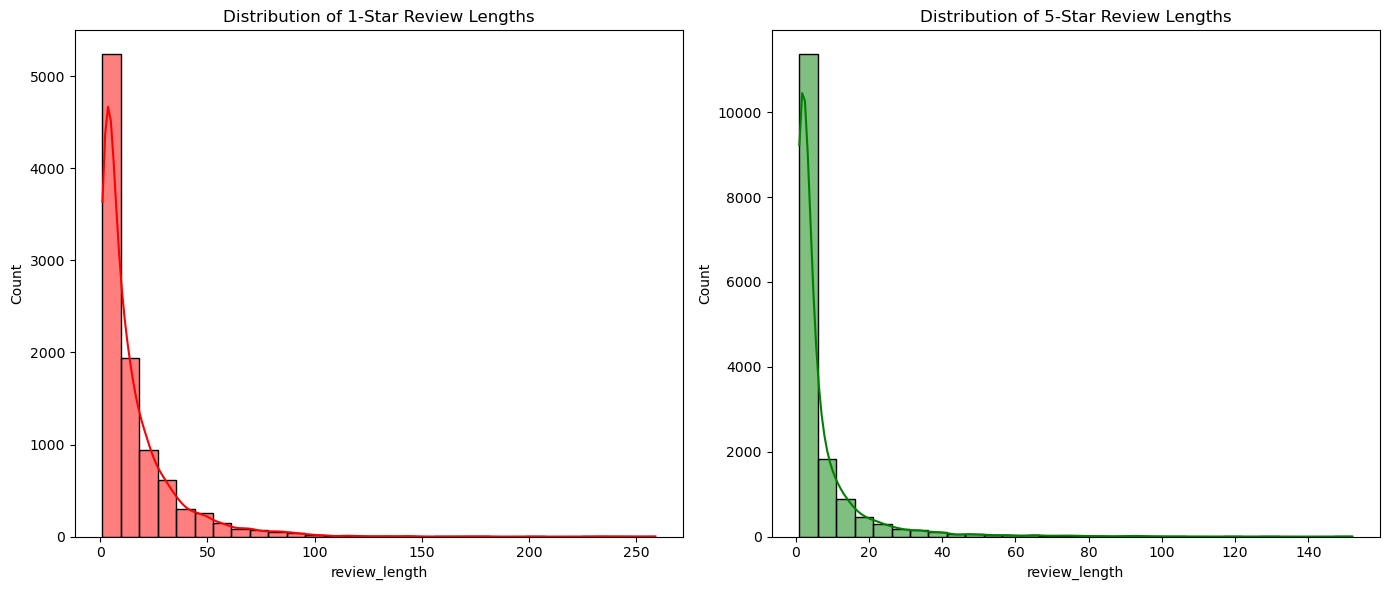

In [6]:
# Calculate the number of words in each review
df['review_length'] = df['review_description'].apply(lambda x: len(x.split()))

# Separate 1-star and 5-star reviews
one_star_reviews = df[df['rating'] == 1]
five_star_reviews = df[df['rating'] == 5]

# Plot the distribution of review lengths
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(one_star_reviews['review_length'], bins=30, color='red', kde=True)
plt.title('Distribution of 1-Star Review Lengths')

plt.subplot(1, 2, 2)
sns.histplot(five_star_reviews['review_length'], bins=30, color='green', kde=True)
plt.title('Distribution of 5-Star Review Lengths')

plt.tight_layout()
plt.show()


In [7]:
# Define a basic set of positive and negative words
positive_words = ['good', 'great', 'love', 'best', 'excellent', 'amazing', 'awesome', 'fantastic', 'positive', 'impressive', 'incredible', 'outstanding', 'perfect', 'wonderful', 'nice']
negative_words = ['bad', 'worst', 'awful', 'terrible', 'horrible', 'poor', 'negative', 'unimpressive', 'disappointing', 'disappointed', 'sucks', 'hate', 'lousy', 'unpleasant', 'regret']

# Define a function to calculate the sentiment score of a review
def calculate_sentiment(review):
    # Initialize the sentiment score
    score = 0
    
    # Count the number of positive and negative words in the review
    for word in review:
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    
    return score

# Calculate the sentiment score for each review
df['sentiment_score'] = df['review_description'].apply(simple_preprocess_text).apply(calculate_sentiment)

# Display the first few rows of the DataFrame
df.head()


,source,review_description,rating,review_date,review_length,sentiment_score
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,85,1
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,81,3
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,91,1
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,94,1
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,79,1


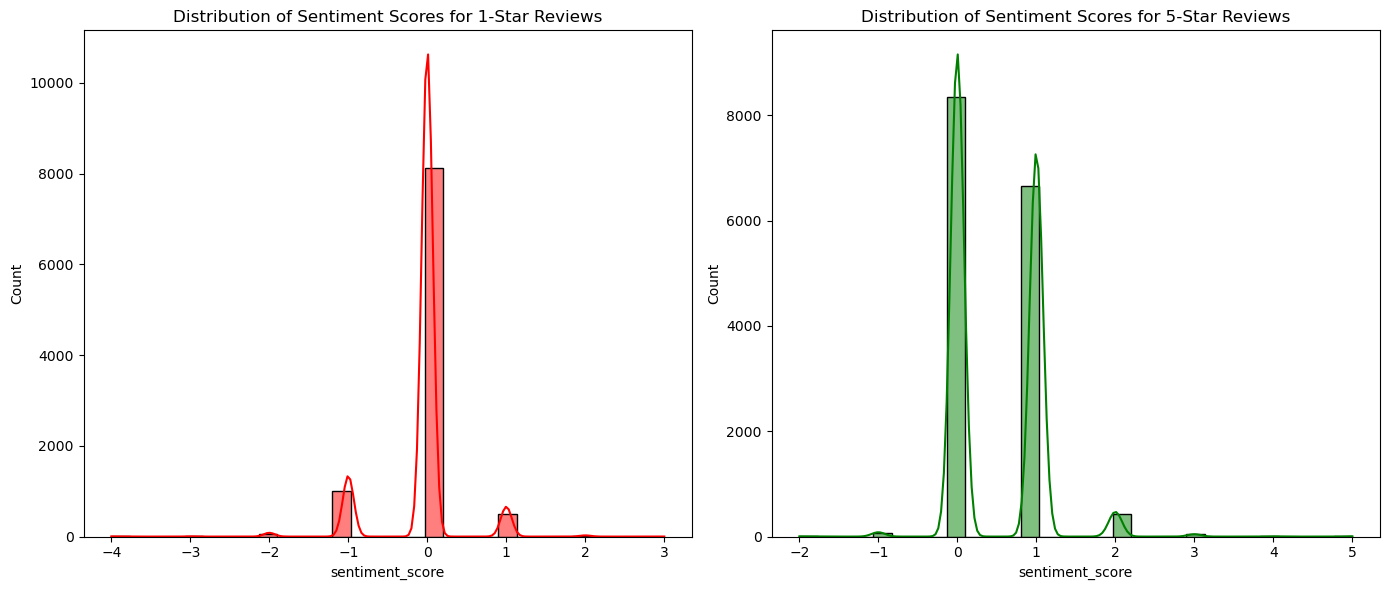

In [8]:
# Separate 1-star and 5-star reviews
one_star_reviews = df[df['rating'] == 1]
five_star_reviews = df[df['rating'] == 5]

# Plot the distribution of sentiment scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(one_star_reviews['sentiment_score'], bins=30, color='red', kde=True)
plt.title('Distribution of Sentiment Scores for 1-Star Reviews')

plt.subplot(1, 2, 2)
sns.histplot(five_star_reviews['sentiment_score'], bins=30, color='green', kde=True)
plt.title('Distribution of Sentiment Scores for 5-Star Reviews')

plt.tight_layout()
plt.show()


In [9]:
# Calculate the correlation between the sentiment scores and the star ratings
correlation = df['sentiment_score'].corr(df['rating'])

correlation


0.411564879703717

In [10]:
# Calculate the average ratings and sentiment scores from the Google Play Store and the App Store
average_scores_by_source = df.groupby('source')[['rating', 'sentiment_score']].mean()

average_scores_by_source


,rating,sentiment_score
source,,
App Store,2.813258,0.180682
Google Play,3.449521,0.284407


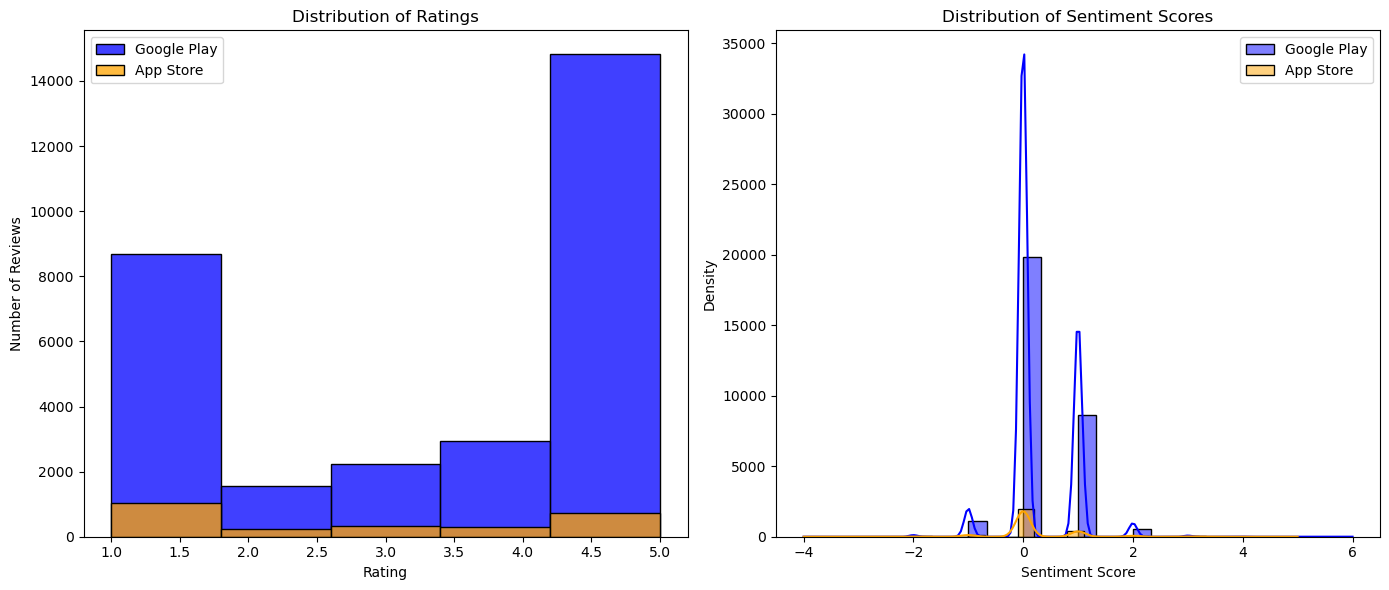

In [11]:
# Plot the distribution of ratings and sentiment scores from the Google Play Store and the App Store
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df['source'] == 'Google Play']['rating'], bins=5, color='blue', kde=False, label='Google Play')
sns.histplot(df[df['source'] == 'App Store']['rating'], bins=5, color='orange', kde=False, label='App Store')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df[df['source'] == 'Google Play']['sentiment_score'], bins=30, color='blue', kde=True, label='Google Play')
sns.histplot(df[df['source'] == 'App Store']['sentiment_score'], bins=30, color='orange', kde=True, label='App Store')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Calculate the correlation between review length and sentiment score
correlation = df['review_length'].corr(df['sentiment_score'])

correlation


-0.001918100923507752

In [13]:
# Define a list of words to count
words_to_count = ['crash', 'bug', 'error', 'love', 'great', 'easy', 'feature', 'update', 'slow', 'fast']


In [14]:
# Define a function to count the occurrences of the selected words in a review
def count_words(review):
    review_words = review.split()
    word_counts = {word: review_words.count(word) for word in words_to_count}
    return word_counts

# Apply the function to the 1-star and 5-star reviews
one_star_word_counts = one_star_reviews['review_description'].apply(count_words)
five_star_word_counts = five_star_reviews['review_description'].apply(count_words)

# Sum the word counts for each word
one_star_total_word_counts = {word: sum(counts[word] for counts in one_star_word_counts) for word in words_to_count}
five_star_total_word_counts = {word: sum(counts[word] for counts in five_star_word_counts) for word in words_to_count}

one_star_total_word_counts, five_star_total_word_counts


({'crash': 34,
  'bug': 111,
  'error': 61,
  'love': 43,
  'great': 41,
  'easy': 19,
  'feature': 53,
  'update': 42,
  'slow': 23,
  'fast': 5},
 {'crash': 7,
  'bug': 15,
  'error': 7,
  'love': 465,
  'great': 306,
  'easy': 191,
  'feature': 75,
  'update': 48,
  'slow': 5,
  'fast': 27})

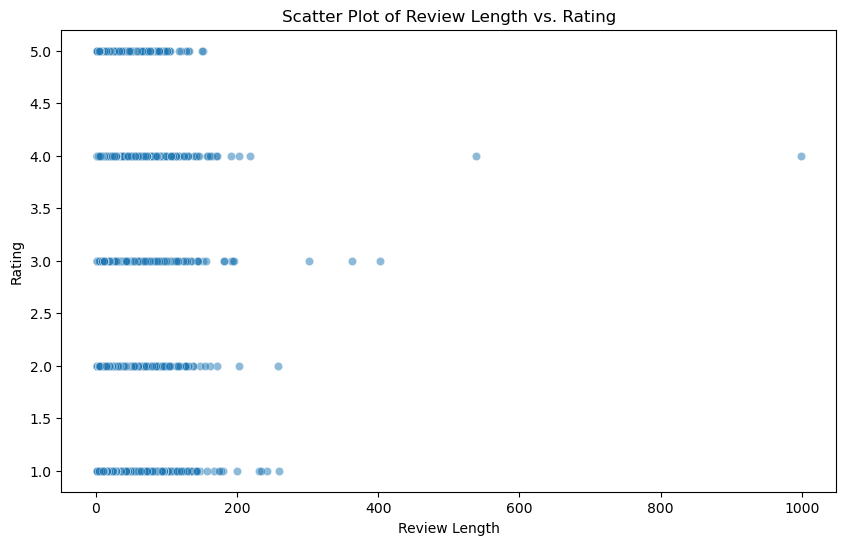

-0.20857473793307088

In [15]:
# Plot the relationship between review length and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='rating', data=df, alpha=0.5)
plt.title('Scatter Plot of Review Length vs. Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

# Calculate the correlation between review length and rating
correlation = df['review_length'].corr(df['rating'])
correlation


In [16]:
# Define a list of words to count
words_to_count = ['performance', 'design', 'functionality', 'price', 'service', 'support', 'interface', 'usability']

# Apply the function to the 1-star and 5-star reviews
one_star_word_counts = one_star_reviews['review_description'].apply(count_words)
five_star_word_counts = five_star_reviews['review_description'].apply(count_words)

# Sum the word counts for each word
one_star_total_word_counts = {word: sum(counts[word] for counts in one_star_word_counts) for word in words_to_count}
five_star_total_word_counts = {word: sum(counts[word] for counts in five_star_word_counts) for word in words_to_count}

one_star_total_word_counts, five_star_total_word_counts


({'performance': 10,
  'design': 10,
  'functionality': 13,
  'price': 0,
  'service': 9,
  'support': 60,
  'interface': 52,
  'usability': 1},
 {'performance': 11,
  'design': 22,
  'functionality': 5,
  'price': 0,
  'service': 7,
  'support': 23,
  'interface': 68,
  'usability': 1})

In [17]:
from collections import Counter

# Define a list of stop words
stop_words = set([
    'the', 'and', 'to', 'of', 'a', 'in', 'is', 'it', 'that', 'for', 'on', 'with', 'as', 'this', 'was', 'are', 'be', 'at', 'but', 'by', 
    'not', 'or', 'from', 'an', 'my', 'have', 'has', 'you', 'i', 'me', 'we', 'do', 'so', 'can', 'if', 'its', 'about', 'all', 'he', 'she', 
    'they', 'them', 'their', 'what', 'which', 'who', 'whom', 'there', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'been', 'being', 
    'your', 'his', 'her', 'our', 'us', 'will', 'would', 'shall', 'should', 'may', 'might', 'must', 'can', 'could', 'here', 'there', 'when', 
    'where', 'why', 'how', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 
    'than', 'too', 'very', 's', 't', 'don', 'just', 'now'
])

# Define a function to preprocess the text and count the frequency of each word
def preprocess_and_count_words(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Split the text into words
    words = text.split()
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Count the frequency of each word
    word_counts = Counter(words)
    
    return word_counts

# Apply the function to the 1-star and 5-star reviews
one_star_word_counts = one_star_reviews['review_description'].apply(preprocess_and_count_words)
five_star_word_counts = five_star_reviews['review_description'].apply(preprocess_and_count_words)

# Sum the word counts for each word
one_star_total_word_counts = sum(one_star_word_counts, Counter())
five_star_total_word_counts = sum(five_star_word_counts, Counter())

# Identify the top 10 most common words in the 1-star and 5-star reviews
one_star_common_words = one_star_total_word_counts.most_common(10)
five_star_common_words = five_star_total_word_counts.most_common(10)

one_star_common_words, five_star_common_words


([('app', 3522),
  ('twitter', 1996),
  ('instagram', 1590),
  ('account', 1245),
  ('threads', 944),
  ('cant', 870),
  ('like', 829),
  ('dont', 742),
  ('copy', 707),
  ('use', 610)],
 [('app', 4149),
  ('good', 2793),
  ('twitter', 2197),
  ('nice', 1705),
  ('better', 1017),
  ('like', 896),
  ('threads', 841),
  ('best', 792),
  ('great', 781),
  ('love', 674)])

In [18]:
# Take a random sample of 1000 reviews from each rating
one_star_sample = one_star_reviews.sample(n=1000, random_state=1)
five_star_sample = five_star_reviews.sample(n=1000, random_state=1)

# Apply the function to the sampled reviews
one_star_word_counts = one_star_sample['review_description'].apply(preprocess_and_count_words)
five_star_word_counts = five_star_sample['review_description'].apply(preprocess_and_count_words)

# Sum the word counts for each word
one_star_total_word_counts = sum(one_star_word_counts, Counter())
five_star_total_word_counts = sum(five_star_word_counts, Counter())

# Identify the top 10 most common words in the 1-star and 5-star reviews
one_star_common_words = one_star_total_word_counts.most_common(10)
five_star_common_words = five_star_total_word_counts.most_common(10)

one_star_common_words, five_star_common_words


([('app', 368),
  ('twitter', 195),
  ('instagram', 170),
  ('account', 112),
  ('threads', 102),
  ('like', 90),
  ('dont', 88),
  ('cant', 86),
  ('copy', 72),
  ('delete', 62)],
 [('app', 266),
  ('good', 182),
  ('twitter', 145),
  ('nice', 105),
  ('better', 61),
  ('best', 54),
  ('threads', 49),
  ('like', 46),
  ('instagram', 44),
  ('great', 43)])

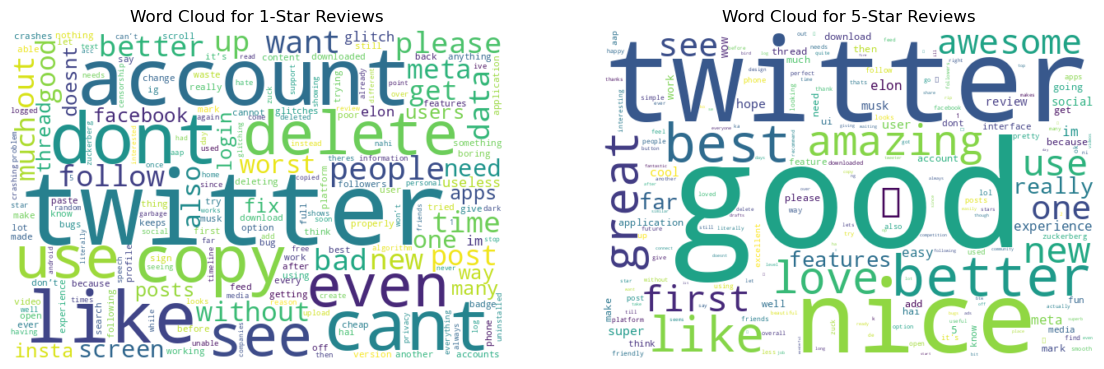

In [19]:
from wordcloud import WordCloud

# Convert the word count dictionaries to a format that the WordCloud function can accept
one_star_word_counts = {word: count for word, count in one_star_total_word_counts.items()}
five_star_word_counts = {word: count for word, count in five_star_total_word_counts.items()}

# Add some additional stop words specific to this dataset
additional_stop_words = ['app', 'instagram', 'threads']
for word in additional_stop_words:
    if word in one_star_word_counts:
        del one_star_word_counts[word]
    if word in five_star_word_counts:
        del five_star_word_counts[word]

# Generate the word clouds
one_star_word_cloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(one_star_word_counts)
five_star_word_cloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(five_star_word_counts)

# Display the word clouds
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(one_star_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 1-Star Reviews')

plt.subplot(1, 2, 2)
plt.imshow(five_star_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 5-Star Reviews')

plt.show()


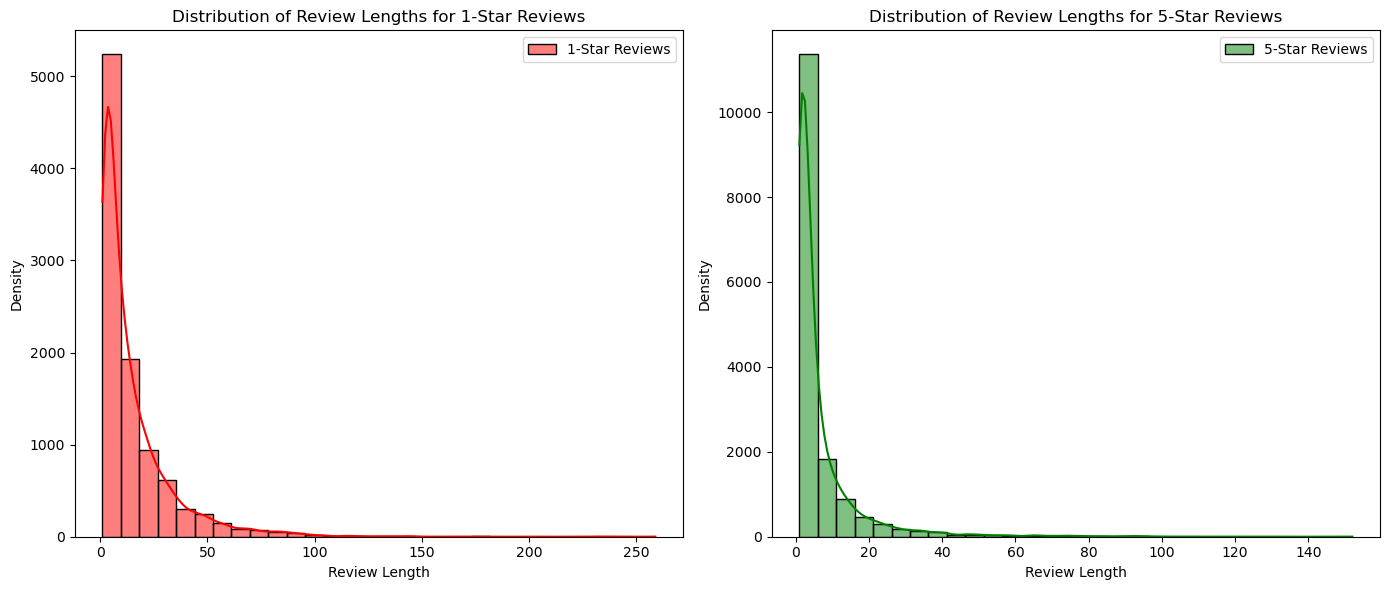

(14.908389882788402, 6.759817468989009)

In [20]:
# Plot the distribution of review lengths for 1-star and 5-star reviews
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(one_star_reviews['review_length'], bins=30, color='red', kde=True, label='1-Star Reviews')
plt.title('Distribution of Review Lengths for 1-Star Reviews')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(five_star_reviews['review_length'], bins=30, color='green', kde=True, label='5-Star Reviews')
plt.title('Distribution of Review Lengths for 5-Star Reviews')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the average review lengths for 1-star and 5-star reviews
average_length_1_star = one_star_reviews['review_length'].mean()
average_length_5_star = five_star_reviews['review_length'].mean()

average_length_1_star, average_length_5_star
